In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm

# adjust the style to emulate ggplot
plt.style.use('ggplot')

YEARS = [2019, 2020, 2021, 2022]
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
          5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
          9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weekdays = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

In [3]:
# loading the data
bicing_status = pd.read_parquet(r'..\data\processed\bicing_status.parquet')
bicing_info = pd.read_parquet(r'..\data\processed\bicing_info.parquet')
meteo_stats = pd.read_parquet(r'..\data\processed\meteo_stats.parquet')
calendar = pd.read_parquet(r'..\data\processed\calendar.parquet')


In [4]:
bicing_status.sample(5)

,station_id,year,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available
13301275,412,2023,5,2,22,0.640000,0.640000,0.520000,0.313726,0.720000
582410,19,2021,3,19,5,0.166667,0.166667,0.166667,0.166667,0.200000
245147,8,2019,11,19,16,0.148148,0.518519,0.703704,0.703704,0.185185
6910380,217,2022,4,4,14,0.961538,0.941176,0.884615,0.884615,0.923077
5024648,157,2019,5,9,13,0.125000,0.125000,0.041667,0.041667,0.208333


In [5]:
bicing_info.sample(5)

,station_id,post_code,lat,lon,altitude,capacity
81,85,8015,41.375187,2.159239,15,40
247,257,8030,41.433933,2.189650,27,24
167,176,8019,41.402363,2.211905,6,31
307,317,8020,41.425663,2.200863,11,27
308,318,8025,41.412426,2.170592,77,32


In [6]:
meteo_stats.sample(5)

,year,month,day,avg_temp,max_temp,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction
79,2019,3,21,12.175,16.525000,8.425000,48.25,0.000000,1006.666687,21.033333,2.700000,70.666664,10.300000,183.666672
60,2020,3,1,15.575,20.500000,11.675000,60.25,0.000000,988.200012,14.700000,3.800000,264.333344,14.833333,284.000000
193,2019,7,13,26.100,30.424999,22.549999,64.50,0.000000,994.299988,27.033333,2.233333,206.000000,9.933333,208.666672
361,2020,12,27,6.750,10.100000,2.950000,56.00,0.000000,987.766663,5.233333,4.700000,287.666656,12.666667,310.000000
113,2019,4,24,14.675,18.075001,12.325000,66.50,0.233333,987.033325,23.333334,4.166667,231.333328,12.833333,233.666672


In [7]:
calendar.sample(5)

,is_holiday,year,month,day,weekday,weekend,season
2021-06-20,False,2021,6,20,7,True,summer
2019-11-21,False,2019,11,21,4,False,autumn
2023-10-16,False,2023,10,16,1,False,autumn
2019-07-29,False,2019,7,29,1,False,summer
2021-11-04,False,2021,11,4,4,False,autumn


In [8]:
# joining the DataFrames: bicing_status and meteo_stats
bicing = (bicing_status
          .merge(bicing_info, on=['station_id'], how='left', validate='many_to_one')
          .merge(calendar, on=['year', 'month', 'day'], how='left', validate='many_to_one')
          .merge(meteo_stats, on=['year', 'month', 'day'], how='left', validate='many_to_one')  # many_to_one: the bicing_status DataFrame has one year, month, day line per station_id
          .astype({'post_code': 'category'})
)

In [9]:
bicing

,station_id,year,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available,...,max_temp,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction
0,1,2019,3,28,21,0.150000,0.383333,0.416667,0.466667,0.033333,...,17.60,9.225,51.25,0.0,1006.599976,22.100000,2.166667,131.666672,7.500000,119.000000
1,1,2019,3,28,22,0.033333,0.150000,0.383333,0.416667,0.066667,...,17.60,9.225,51.25,0.0,1006.599976,22.100000,2.166667,131.666672,7.500000,119.000000
2,1,2019,3,28,23,0.066667,0.033333,0.150000,0.383333,0.033333,...,17.60,9.225,51.25,0.0,1006.599976,22.100000,2.166667,131.666672,7.500000,119.000000
3,1,2019,3,29,0,0.033333,0.066667,0.033333,0.150000,0.034483,...,16.85,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328
4,1,2019,3,29,3,0.034483,0.033333,0.066667,0.033333,0.033333,...,16.85,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15954872,519,2023,5,31,18,0.833333,0.916667,0.913043,0.958333,0.916667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15954873,519,2023,5,31,19,0.916667,0.833333,0.916667,0.913043,0.875000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15954874,519,2023,5,31,20,0.875000,0.916667,0.833333,0.916667,0.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15954875,519,2023,5,31,21,0.833333,0.875000,0.916667,0.833333,0.808511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
bicing.shape

(15954877, 30)

In [11]:
bicing.dtypes

station_id                      uint16
year                            uint16
month                            uint8
day                              uint8
hour                             uint8
ctx_1                          float32
ctx_2                          float32
ctx_3                          float32
ctx_4                          float32
percentage_docks_available     float32
post_code                     category
lat                            float32
lon                            float32
altitude                        uint16
capacity                         uint8
is_holiday                        bool
weekday                          uint8
weekend                           bool
season                        category
avg_temp                       float32
max_temp                       float32
min_temp                       float32
avg_rel_humidity               float32
acum_precipitation             float32
avg_atm_pressure               float32
global_solar_rad         

In [12]:
bicing.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15954877 entries, 0 to 15954876
Data columns (total 30 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   station_id                  uint16  
 1   year                        uint16  
 2   month                       uint8   
 3   day                         uint8   
 4   hour                        uint8   
 5   ctx_1                       float32 
 6   ctx_2                       float32 
 7   ctx_3                       float32 
 8   ctx_4                       float32 
 9   percentage_docks_available  float32 
 10  post_code                   category
 11  lat                         float32 
 12  lon                         float32 
 13  altitude                    uint16  
 14  capacity                    uint8   
 15  is_holiday                  bool    
 16  weekday                     uint8   
 17  weekend                     bool    
 18  season                      category
 19

In [13]:
(bicing
 .memory_usage(deep=True)
 .pipe(lambda ser: ser/ser.sum()*100)
 .sort_values(ascending=False)
)

max_streak_wind_direction     4.597695
percentage_docks_available    4.597695
max_temp                      4.597695
avg_temp                      4.597695
acum_precipitation            4.597695
avg_atm_pressure              4.597695
global_solar_rad              4.597695
lon                           4.597695
lat                           4.597695
avg_rel_humidity              4.597695
min_temp                      4.597695
ctx_4                         4.597695
ctx_3                         4.597695
ctx_2                         4.597695
ctx_1                         4.597695
avg_wind_speed                4.597695
avg_wind_direction            4.597695
max_wind_speed                4.597695
altitude                      2.298847
station_id                    2.298847
year                          2.298847
post_code                     1.149526
season                        1.149454
capacity                      1.149424
weekend                       1.149424
weekday                  

In [14]:
bicing_cols = bicing.columns.to_list()
bicing_cols.remove('percentage_docks_available')
bicing_cols.append('percentage_docks_available')    # remove first and append after to include the column name at the end of the list

bicing = bicing.loc[:, bicing_cols] # relocating the target variable

In [15]:
bicing.to_parquet(fr'..\data\processed\bicing_full.parquet')

In [16]:
bicing.describe().T

,count,mean,std,min,25%,50%,75%,max
station_id,15954877.0,250.136169,145.028594,1.000000,126.000000,249.000000,371.000000,519.000000
year,15954877.0,2020.962397,1.225174,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
month,15954877.0,6.496580,3.429931,1.000000,4.000000,6.000000,9.000000,12.000000
day,15954877.0,15.737369,8.782911,1.000000,8.000000,16.000000,23.000000,31.000000
hour,15954877.0,11.576811,6.852258,0.000000,6.000000,12.000000,17.000000,23.000000
ctx_1,15954877.0,0.601815,0.283120,0.000275,0.382353,0.650000,0.860000,0.981481
ctx_2,15954877.0,0.601816,0.283120,0.000275,0.382353,0.650000,0.860000,0.981481
ctx_3,15954877.0,0.601816,0.283120,0.000275,0.382353,0.650000,0.860000,0.981481
ctx_4,15954877.0,0.601816,0.283120,0.000275,0.382353,0.650000,0.860000,0.981481
lat,15954877.0,41.399113,0.020576,41.346775,41.383598,41.395473,41.411083,41.462093


In [17]:
(bicing
 .isna()
 .sum()
#  .pipe(lambda ser: ser/ser.sum()*100) # percentage of missing values per column
)

station_id                        0
year                              0
month                             0
day                               0
hour                              0
ctx_1                             0
ctx_2                             0
ctx_3                             0
ctx_4                             0
post_code                         0
lat                               0
lon                               0
altitude                          0
capacity                          0
is_holiday                        0
weekday                           0
weekend                           0
season                            0
avg_temp                      11300
max_temp                      11300
min_temp                      11300
avg_rel_humidity              11300
acum_precipitation            11300
avg_atm_pressure              11300
global_solar_rad              11300
avg_wind_speed                11300
avg_wind_direction            11300
max_wind_speed              

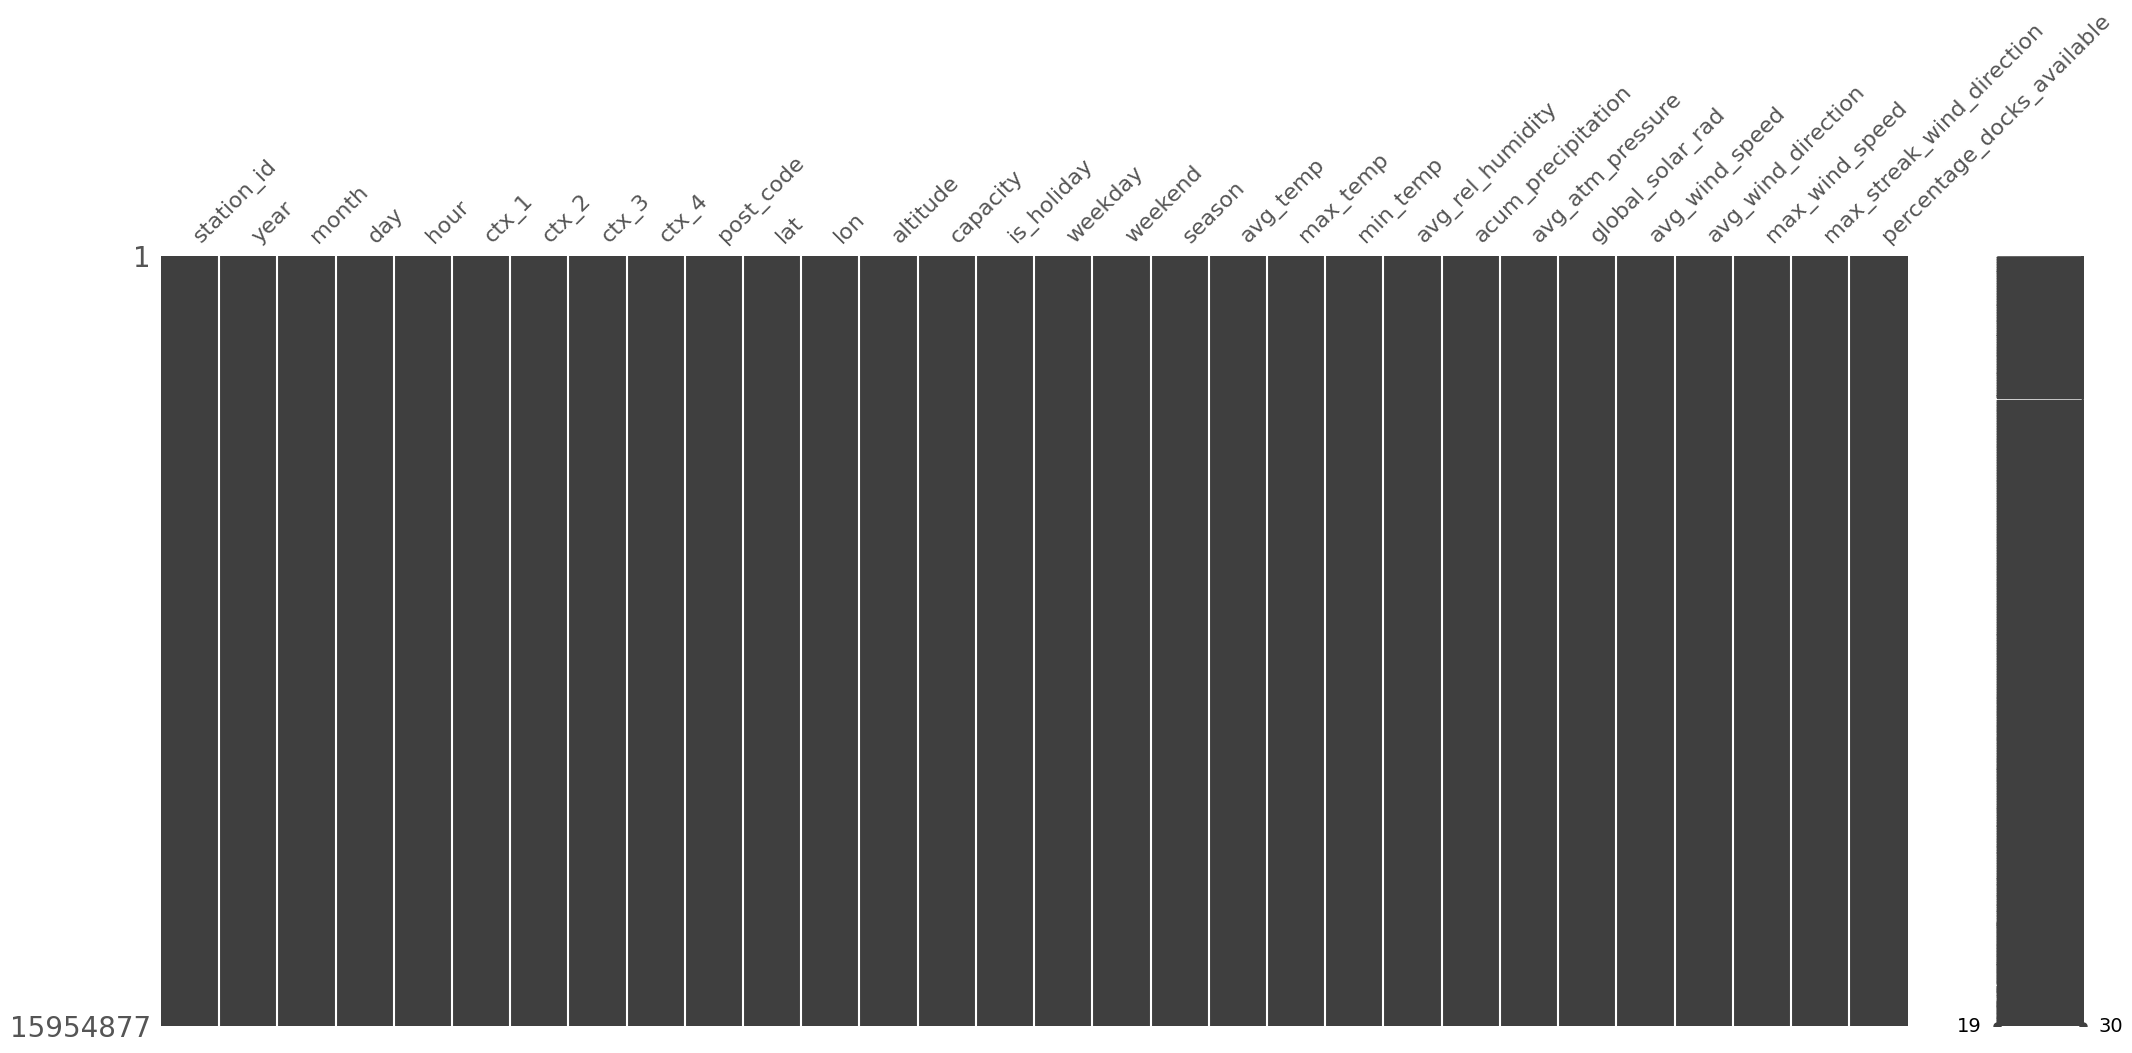

In [18]:
ax = msno.matrix(bicing.sort_values(by=['station_id', 'year', 'month', 'day']))
ax.get_figure().savefig(r'..\reports\figures\jdf_bicing_0101.png')

In [19]:
(bicing
 .select_dtypes('number')
 .drop(columns=['station_id', 'year'])
 .corr(method='spearman')
 .style
 .background_gradient(cmap='RdBu', vmax=1, vmin=-1)
 .set_sticky(axis='index')
)

,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,lat,lon,altitude,capacity,weekday,avg_temp,max_temp,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction,percentage_docks_available
month,1.000000,0.013975,0.001692,0.055761,0.055793,0.055833,0.055876,-0.003597,0.005208,-0.008393,0.000797,-0.005116,0.303235,0.269651,0.316075,0.103528,0.027899,-0.176342,-0.128410,-0.086012,0.037441,-0.049803,0.053743,0.055749
day,0.013975,1.000000,0.002566,0.000199,0.000195,0.000207,0.000221,0.000668,-0.000164,0.000685,-0.000396,-0.001867,0.053717,0.048422,0.059464,0.044816,-0.045495,0.035750,0.015385,-0.053214,0.001746,-0.028579,-0.005276,0.000207
hour,0.001692,0.002566,1.000000,0.053410,0.060015,0.064961,0.065169,-0.001841,0.001478,-0.002456,-0.002696,-0.000531,0.002219,0.002077,0.002241,-0.000947,-0.002323,0.001067,0.002949,0.000759,-0.001967,0.000911,0.000169,0.043406
ctx_1,0.055761,0.000199,0.053410,1.000000,0.882764,0.761836,0.657506,0.106101,-0.247121,0.362471,-0.001388,-0.012430,0.061742,0.061895,0.060951,-0.005952,-0.017724,0.005405,0.021782,-0.020859,-0.010644,-0.017188,-0.013446,0.882764
ctx_2,0.055793,0.000195,0.060015,0.882764,1.000000,0.882764,0.761836,0.106098,-0.247120,0.362467,-0.001390,-0.012308,0.061649,0.061761,0.060894,-0.005830,-0.017451,0.005386,0.021486,-0.020903,-0.010879,-0.017158,-0.013622,0.761836
ctx_3,0.055833,0.000207,0.064961,0.761836,0.882764,1.000000,0.882764,0.106097,-0.247118,0.362463,-0.001390,-0.012209,0.061561,0.061628,0.060843,-0.005681,-0.017150,0.005369,0.021169,-0.020926,-0.011112,-0.017085,-0.013782,0.657506
ctx_4,0.055876,0.000221,0.065169,0.657506,0.761836,0.882764,1.000000,0.106096,-0.247116,0.362460,-0.001392,-0.011928,0.061475,0.061486,0.060792,-0.005479,-0.016779,0.005361,0.020815,-0.020972,-0.011400,-0.017012,-0.014016,0.565483
lat,-0.003597,0.000668,-0.001841,0.106101,0.106098,0.106097,0.106096,1.000000,0.455051,0.323373,-0.062911,-0.001151,-0.004204,-0.003422,-0.004269,-0.000519,0.000818,0.002967,-0.003630,-0.002937,0.000382,-0.002266,0.000103,0.106103
lon,0.005208,-0.000164,0.001478,-0.247121,-0.247120,-0.247118,-0.247116,0.455051,1.000000,-0.648342,0.032534,0.000543,0.004783,0.004235,0.004802,0.000785,-0.000204,-0.001912,0.002482,0.000893,-0.000520,0.000408,-0.000595,-0.247121
altitude,-0.008393,0.000685,-0.002456,0.362471,0.362467,0.362463,0.362460,0.323373,-0.648342,1.000000,-0.096738,-0.001035,-0.007825,-0.006684,-0.007903,-0.001175,0.000998,0.004010,-0.004852,-0.003105,0.000613,-0.002109,0.000476,0.362474


  0%|          | 0/4 [00:00<?, ?it/s]

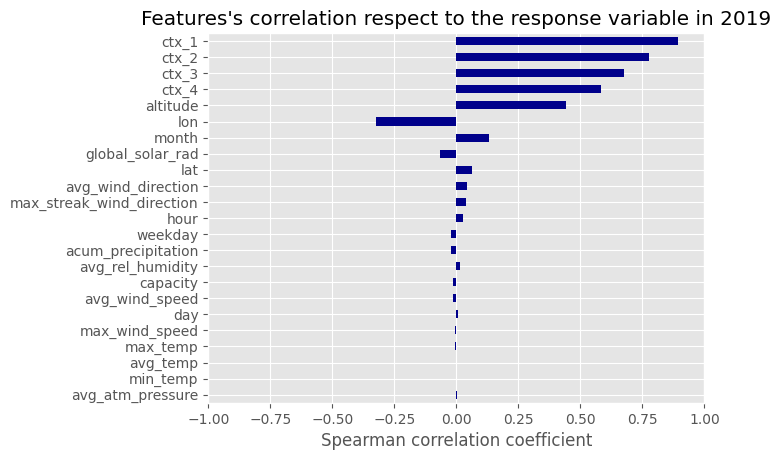

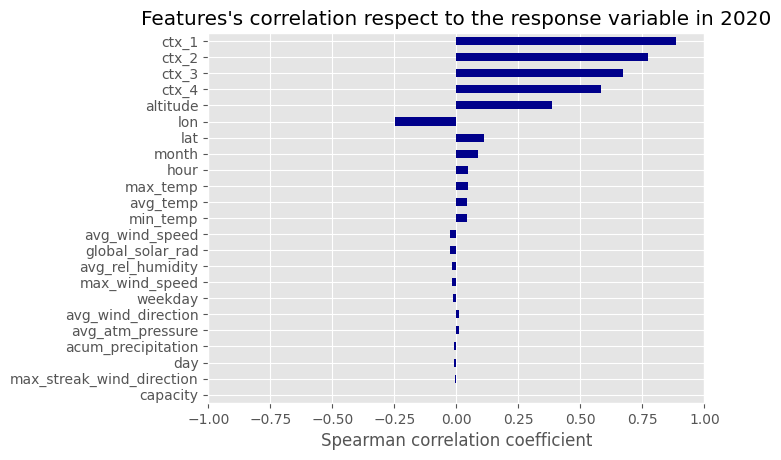

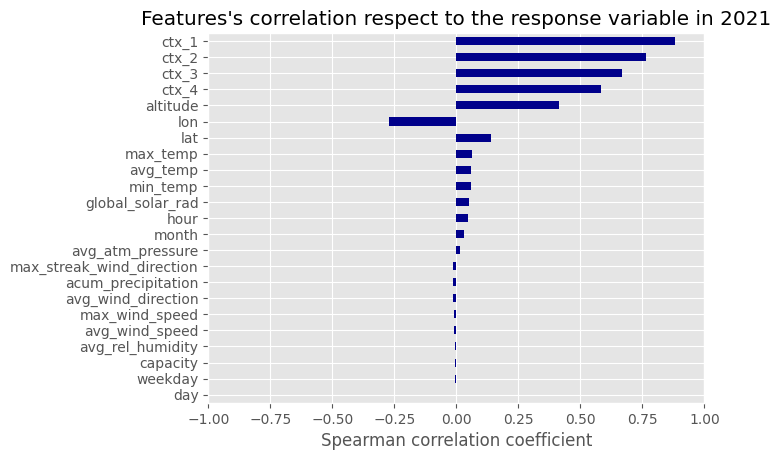

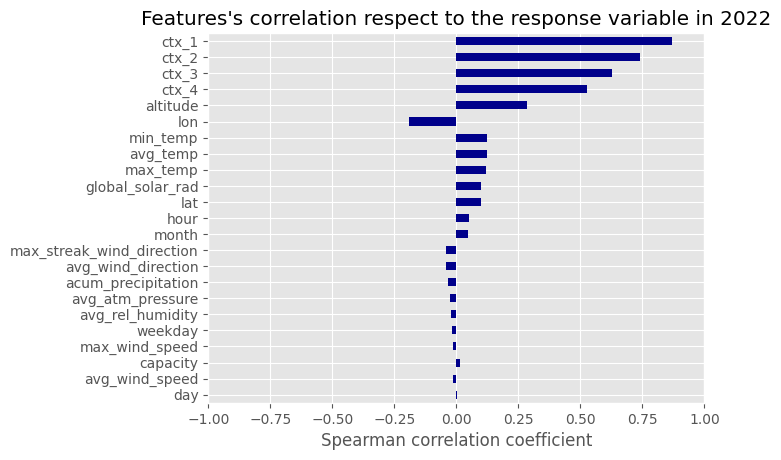

In [20]:
for year in tqdm(YEARS):
    
    fig, ax = plt.subplots()
    
    (bicing
     .query(f'year == {year}')
     .loc[:, bicing_cols]
     .select_dtypes('number')
     .drop(columns=['station_id', 'year'])
     .corr(method='spearman')
     .loc[:, 'percentage_docks_available']
     .iloc[:-1]
     .sort_values(key=lambda val: abs(val))
     .plot.barh(ax=ax, color='darkblue', xlim=(-1, 1))
    )
    
    plt.xlabel('Spearman correlation coefficient')
    plt.title(f"Features's correlation respect to the response variable in {year}")

In [21]:
(bicing
 .pivot_table(index='station_id', columns='year', values='month', aggfunc='nunique', margins=True)
 .query('All != 12')
)

year,2019,2020,2021,2022,2023,All
station_id,,,,,,


  0%|          | 0/4 [00:00<?, ?it/s]

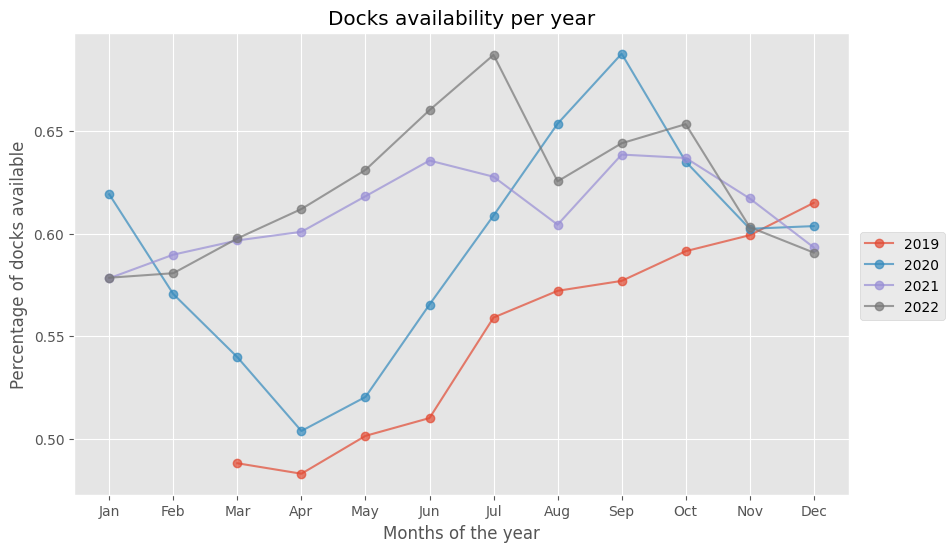

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

for year in tqdm(YEARS):

    (bicing
     .loc[bicing['year'] == year, ['month', 'percentage_docks_available']]
     .groupby(by=['month'])
     .mean()
     .plot(legend=False, marker='o', alpha=0.7, ax=ax)
    )

plt.xticks(range(1, 13), [months[month] for month in range(1, 13)])
plt.xlabel('Months of the year')
plt.ylabel('Percentage of docks available')
plt.title('Docks availability per year')

fig.legend(YEARS, loc='center right')

  0%|          | 0/4 [00:00<?, ?it/s]

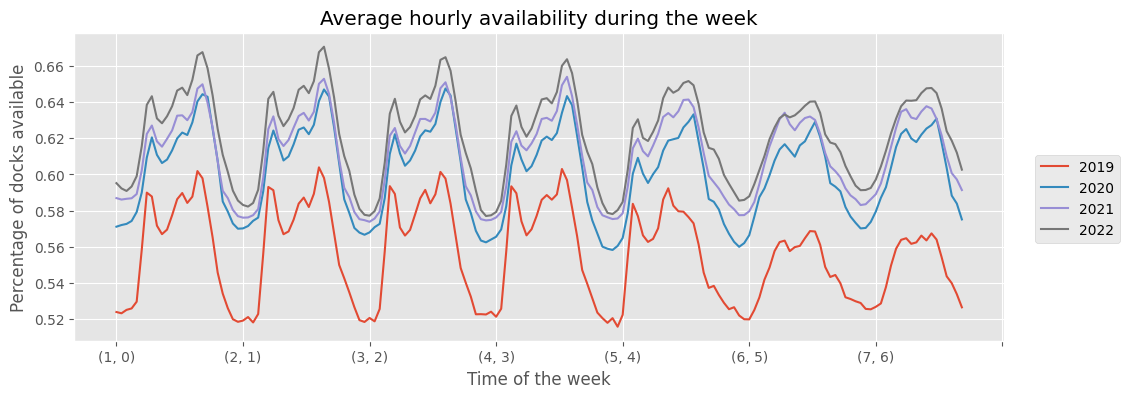

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))

for year in tqdm(YEARS):

    (bicing
     .loc[bicing['year'] == year, ['weekday', 'hour', 'percentage_docks_available']]
     .sort_values(by=['weekday', 'hour'])
     .groupby(by=['weekday', 'hour'])
     ['percentage_docks_available']
     .mean()
     .plot(legend=False, ax=ax)
    )

plt.xlabel('Time of the week')
plt.ylabel('Percentage of docks available')
plt.title('Average hourly availability during the week')

fig.legend(YEARS, loc='center right')

In [27]:
(bicing
 .set_index('year')
 .drop(index=[2019, 2020])
 .reset_index()
 .describe()
 .T
 )

,count,mean,std,min,25%,50%,75%,max
year,10160128.0,2021.748939,0.717769,2021.000000,2021.000000,2022.000000,2022.000000,2023.000000
station_id,10160128.0,259.570803,148.837696,1.000000,131.000000,260.000000,386.000000,519.000000
month,10160128.0,5.946158,3.466253,1.000000,3.000000,5.000000,9.000000,12.000000
day,10160128.0,15.696694,8.762311,1.000000,8.000000,16.000000,23.000000,31.000000
hour,10160128.0,11.549315,6.868311,0.000000,6.000000,12.000000,17.000000,23.000000
ctx_1,10160128.0,0.612446,0.273077,0.018519,0.407407,0.666667,0.857143,0.981481
ctx_2,10160128.0,0.612444,0.273075,0.018519,0.407407,0.666667,0.857143,0.981481
ctx_3,10160128.0,0.612442,0.273075,0.018519,0.407407,0.666667,0.857143,0.981481
ctx_4,10160128.0,0.612439,0.273074,0.018519,0.407407,0.666667,0.857143,0.981481
lat,10160128.0,41.399685,0.020997,41.346775,41.383839,41.396099,41.412067,41.462093


<Axes: >

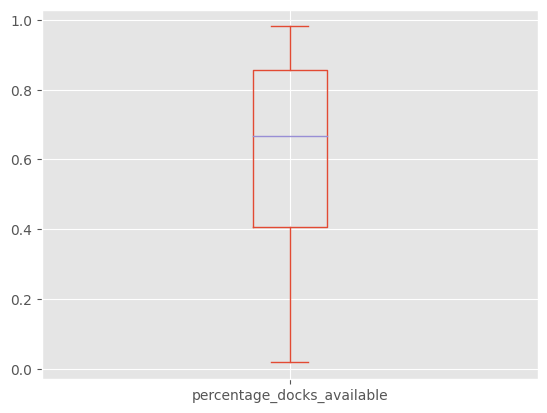

In [25]:
(bicing
 .set_index('year')
 .drop(index=[2019, 2020])
 .reset_index()
 .percentage_docks_available
 .plot.box()
 )